In [1]:
import pandas as pd
import numpy

/Users/vega7unk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install -i https://test.pypi.org/simple/ my_krml_25076922==2024.0.3.4

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT3/at_3/adv_mla_at3/data/df_cleaned_num.csv')

In [4]:
df.head()

,totalTravelDistance,totalFare,travelDurationHours,numSegments,daysUntilDeparture,startingAirport_encoded,destinationAirport_encoded,isNonStop_encoded,isBasicEconomy_encoded,isRefundable_encoded,cabinType_encoded,timeBlock_encoded
0,3310.0,620.10,11.566667,3,17,12,10,0,0,0,1,0
1,3438.0,1301.10,16.083333,3,55,12,6,0,0,0,1,3
2,2335.0,537.20,13.933333,2,58,12,4,0,0,0,1,0
3,1689.0,567.00,8.433333,2,33,12,3,0,0,0,1,1
4,2556.0,866.71,14.550000,3,53,12,14,0,0,0,1,0


In [25]:
df['totalFare'].describe()

count    22286.000000
mean       385.641638
std        214.520576
min         23.970000
25%        231.700000
50%        354.200000
75%        501.600000
max       3304.610000
Name: totalFare, dtype: float64

In [5]:
df_cleaned = df.copy()

In [6]:
from my_krml_25076922.data.sets import pop_target, split_sets_random

features, target = pop_target(df_cleaned, target_col='totalFare')
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(features, target, test_ratio=0.2)

In [7]:
from my_krml_25076922.data.sets import save_sets

save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path='/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT3/at_3/adv_mla_at3/data/processed/LGBM/')

In [8]:
import lightgbm as lgb

clf = lgb.LGBMRegressor()

In [9]:
from my_krml_25076922.models.performance import fit_assess_regressor

light_gbm = fit_assess_regressor(clf, X_train, y_train, X_val, y_val)

RMSE Training: 118.59187622104542
MAE Training: 81.54180533281057
RMSE Validation: 144.8007083767154
MAE Validation: 92.5681099797254


The validation RMSE is considerably higher than the training RMSE. This indicates that the model is likely overfitting on the training data, capturing specific patterns that don’t generalize well to new data.
While the MAE on the validation set is slightly higher than the training MAE, it confirms that the model makes larger average errors on the validation set, further supporting the presence of overfitting.

In [12]:
from joblib import dump

dump(light_gbm,  '/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT3/at_3/adv_mla_at3/models/lightgbm_default.joblib')

['/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT3/at_3/adv_mla_at3/models/lightgbm_default.joblib']

In [13]:
lightgbm1 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=200), X_train, y_train, X_val, y_val)

RMSE Training: 107.70152422420587
MAE Training: 73.60738921111296
RMSE Validation: 142.55051265085862
MAE Validation: 89.98830053588189


In [14]:
lightgbm2 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=50), X_train, y_train, X_val, y_val)

RMSE Training: 128.2336401587452
MAE Training: 88.24783394341
RMSE Validation: 147.83204013212173
MAE Validation: 95.51387738303413


In [15]:
lightgbm3 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=75), X_train, y_train, X_val, y_val)

RMSE Training: 122.7435953228103
MAE Training: 84.44172276096828
RMSE Validation: 145.96723937010913
MAE Validation: 93.7796595153535


In [16]:
lightgbm4 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=50, num_leaves=50), X_train, y_train, X_val, y_val)

RMSE Training: 121.33503765573231
MAE Training: 83.23514929902247
RMSE Validation: 145.3614997147418
MAE Validation: 93.2124569871433


In [17]:
lightgbm5 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=75, num_leaves=50, max_depth=12), X_train, y_train, X_val, y_val)

RMSE Training: 115.58884853048643
MAE Training: 79.03834011141278
RMSE Validation: 143.60879621270627
MAE Validation: 91.57556749436856


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'num_leaves': [25, 50],
    'max_depth': [10, 12],
    'learning_rate': [0.1, 0.2],
    'lambda_l1': [0.1] 
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
Best Parameters: {'lambda_l1': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 50}
Best RMSE: 130.36506531518054


In [21]:
lightgbm6 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=100, num_leaves=50, max_depth=10, learning_rate=0.2, lambda_l1=0.1), X_train, y_train, X_val, y_val)

RMSE Training: 99.90015027370005
MAE Training: 68.16440439501949
RMSE Validation: 142.29271155350355
MAE Validation: 89.41784767877944


In [23]:
lightgbm7 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=100, num_leaves=50, max_depth=10, learning_rate=0.2, lambda_l1=0.2, lambda_l2=0.1), X_train, y_train, X_val, y_val)

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
RMSE Training: 99.5636964507594
MAE Training: 67.14751400241992
RMSE Validation: 141.09677647400224
MAE Validation: 88.30429982149346


In [27]:
lightgbm8 = fit_assess_regressor(lgb.LGBMRegressor(n_estimators=100, num_leaves=40, max_depth=8, learning_rate=0.2, lambda_l1=0.1), X_train, y_train, X_val, y_val)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
RMSE Training: 105.44816606615825
MAE Training: 71.69460679543818
RMSE Validation: 141.68041313458278
MAE Validation: 89.31473994499721


In [28]:
lightgbm_best = lightgbm7

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

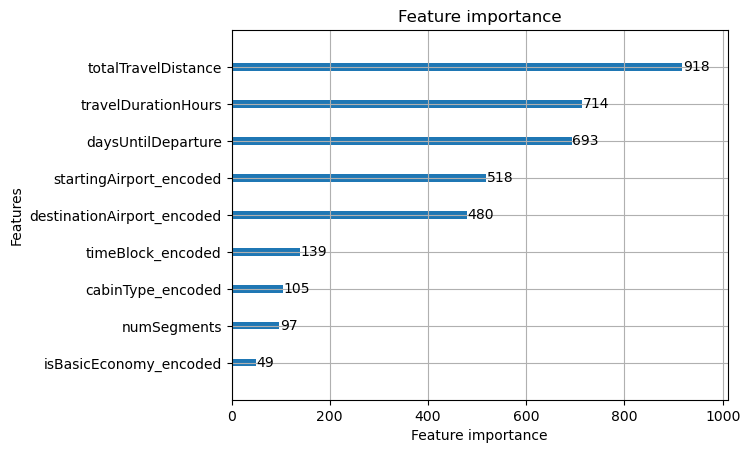

In [29]:
from lightgbm import plot_importance
plot_importance(lightgbm_best)

In [30]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    lightgbm_best, X_train, y_train,
    n_repeats=30,
    random_state=8
)

In [31]:
for i in r.importances_mean.argsort()[::-1]:
     print(f"{df_cleaned.columns[i]}: {r.importances_mean[i]:.5f}")

totalTravelDistance: 0.60095
isRefundable_encoded: 0.16261
numSegments: 0.13083
daysUntilDeparture: 0.12909
startingAirport_encoded: 0.11037
travelDurationHours: 0.10985
totalFare: 0.10817
isNonStop_encoded: 0.06007
cabinType_encoded: 0.02556
isBasicEconomy_encoded: 0.00000
destinationAirport_encoded: 0.00000


PDP for `totalTravelDistance` (0) with target 0
PDP for `totalTravelDistance` (0) with target 1
PDP for `totalTravelDistance` (0) with target 2
PDP for `totalTravelDistance` (0) with target 3


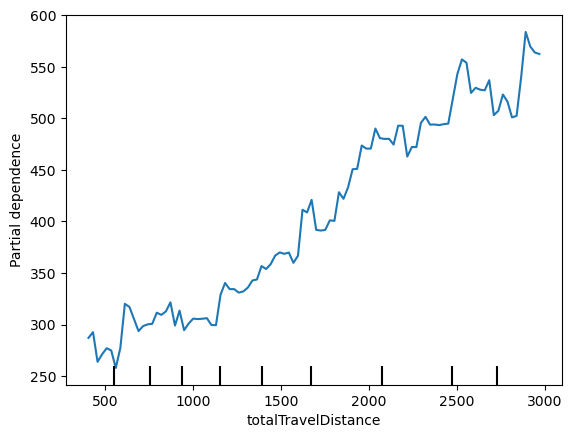

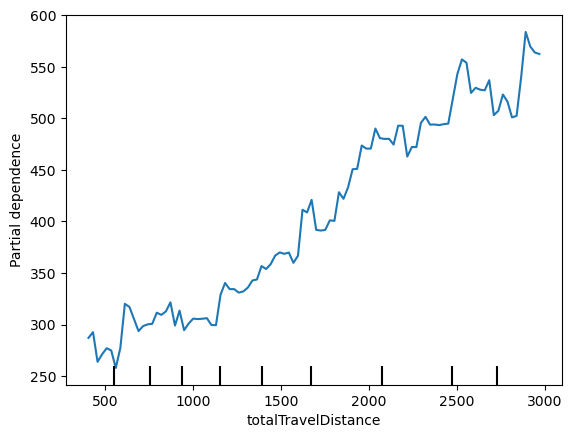

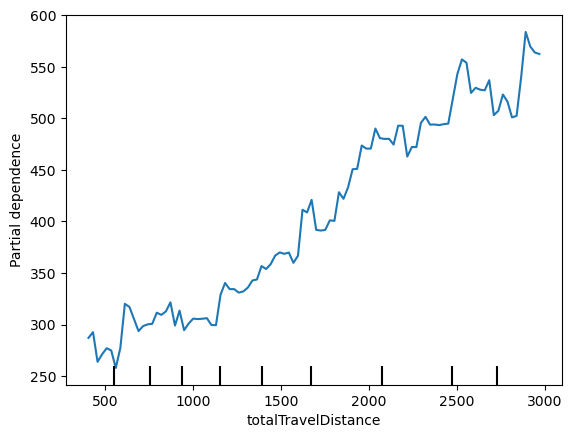

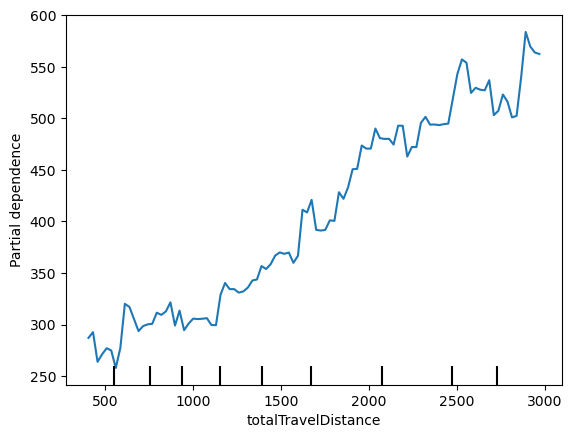

In [32]:
from sklearn.inspection import PartialDependenceDisplay

def plot_pdp(model, X, feature_name, feature_cols, target_classes):
    feature_index = feature_cols.get_loc(feature_name)

    for target_class in target_classes:
        print(f"PDP for `{feature_cols[feature_index]}` ({feature_index}) with target {target_class}")

        PartialDependenceDisplay.from_estimator(
            model,
            X,
            features=[feature_index],
            feature_names=df_cleaned.columns,
            target=target_class
        )
        
target_classes=[0, 1, 2, 3]

plot_pdp(model=lightgbm_best, X=X_train, feature_name='totalTravelDistance', feature_cols=df_cleaned.columns, target_classes=target_classes)

In [35]:
import joblib

joblib.dump(lightgbm_best, '/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT3/at_3/adv_mla_at3/models/lightgbm_model.pkl')
print("Model saved as 'lightgbm_model.pkl'")

Model saved as 'lightgbm_model.pkl'
